In [1]:
using LinearAlgebra
using Plots
using LaTeXStrings

In [2]:
function QuanWal_ring(n::Int64,P::Int64,ϕ::Vector{ComplexF64}
        ,H::Matrix{Float64}=1/sqrt(2)*[1 1; 1 -1])  
    #n numero de pasos
    #P numero de nodos 
    #ϕ estado inicial
    #H la matriz Hadamar u otro operador unitario que se quiera explorar
    
    
    
    kb=[[1,0],[0,1]] #BASE USUAL en un vector de vectores que contenga cada uno

    A=Array{Vector{ComplexF64}}(undef, P) #En este array se colocan los estados vector  para  un  paso
    B=Array{Vector{ComplexF64}}(undef, P) #En este array se colocan los estados vector  para otro paso
    
    @inbounds for i=1:P #Rellenamos con estados cero para trabajar con ellos
        A[i]=[0,0]
        B[i]=[0,0]
    end;
    
    
    
    ########COLOCACION DE ESTADO INICIAL###################################3
    if P%2==0                   # si P es par hay que colocarlo cerca de en medio
        A[Int64(P/2)]=ϕ
    else                        # si P es impar hay que colocarlo en medio  
        A[Int64((P-1)/2 +1)]=ϕ
    end
    ########################################################################
    
    
    ############DINÁMICA###############
    for k=0:n # para cada paso

        if k%2!=0 ## checamos si es impar

            for i=1:P   ###Como empezamos desde un punto arbitrario podemos revisar todas las posiciones de una vez

                if kb[1]*transpose(kb[1])*(H*A[i]) != [0+0im,0+0im]  ####Si la proyección |L><L|H|phi> es diferente de 0
                    if i-1<1
                        B[P]=B[P]+kb[1]*transpose(kb[1])*(H*A[i])
                    else
                        B[i-1]=B[i-1]+kb[1]*transpose(kb[1])*(H*A[i])    #entonces en B escribira el nuevo qbit H|phi> en la posición n-1=4-1=3
                    end
                end                                                  #Sumandola a la anterior que estaba allí

                if kb[2]*transpose(kb[2])*(H*A[i]) != [0+0im,0+0im] ####Si la proyección |R><R|H|phi> es diferente de 0
                    if i+1>P
                        B[1]=B[1]+kb[2]*transpose(kb[2])*(H*A[i])
                    else
                        B[i+1]=B[i+1]+kb[2]*transpose(kb[2])*(H*A[i])   #entonces en B escribira el nuevo qbit H|phi> en la posición n+1=4+1=5
                    end
                end                                                 #Sumandola a la anterior que estaba allí
            end
            for i=1:P
                A[i]=[0,0]                                      #Por último se reescribe A para que quede en ceros [0,0]
            end

        else ## checamos si es par

            for i=1:P   ###Como empezamos desde un punto arbitrario podemos revisar todas las posiciones de una vez
                if kb[1]*transpose(kb[1])*(H*B[i]) != [0+0im,0+0im]  #Si la proyección |L><L|H|phi> es diferente de 0
                    #println("hola2")
                    if i-1<1
                        A[P]=A[P]+kb[1]*transpose(kb[1])*(H*B[i])
                    else
                        A[i-1]=A[i-1]+kb[1]*transpose(kb[1])*(H*B[i])    #entonces en B escribira el nuevo qbit H|phi> en la posición n-1=4-1=3
                        #println("hola3")
                    end
                end                                                  #Sumandola a la anterior que estaba allí

                if kb[2]*transpose(kb[2])*(H*B[i]) != [0+0im,0+0im] #Si la proyección |R><R|H|phi> es diferente de 0
                    if i+1>P
                        A[1]=A[1]+kb[2]*transpose(kb[2])*(H*B[i])
                    else
                        A[i+1]=A[i+1]+kb[2]*transpose(kb[2])*(H*B[i])   #entonces en B escribira el nuevo qbit H|phi> en la posición n+1=4+1=5
                    end
                end                                                 #Sumandola a la anterior que estaba allí
            end
            for i=1:P
                B[i]=[0,0]                                      #Por último se reescribe A para que quede en ceros [0,0]
            end
        end

    end
    if n%2==0
        return A
    else
        return B
    end
end

QuanWal_ring (generic function with 2 methods)

In [3]:
n=1000  #Numerp de pasos
P=101 #Numero de nodos
ϕ=1/sqrt(2)*[1, 1*im]
#ϕ=1.0/sqrt(2)*[1*im,1*im]
H=1/sqrt(2)*[1 1; 1 -1];


In [4]:
@time G=QuanWal_ring(n,P,ϕ,H);


  0.222574 seconds (1.78 M allocations: 161.330 MiB, 20.16% gc time)


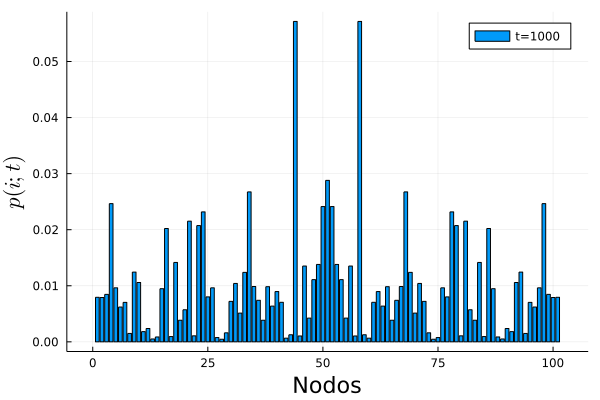

In [5]:
fnt = Plots.font("sans-serif", 15) # Para gráficar loas labels

bar(1:1:P,norm.(G).^2,guidefont=fnt,ylabel=L"p(i;t)",xlabel="Nodos",label="t=1000")

In [6]:
P=101
stp=1
paso=500

500

 38.480980 seconds (221.13 M allocations: 18.997 GiB, 8.26% gc time, 1.47% compilation time)


┌ Info: Saved animation to 
│   fn = /home/sebas/Escritorio/Cosas de Git/quantum-walks-julia/Anillo/QW_ring_real(1_2).gif
└ @ Plots /home/sebas/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/home/sebas/Escritorio/Cosas de Git/quantum-walks-julia/Anillo/QW_ring_real(1_2).gif")
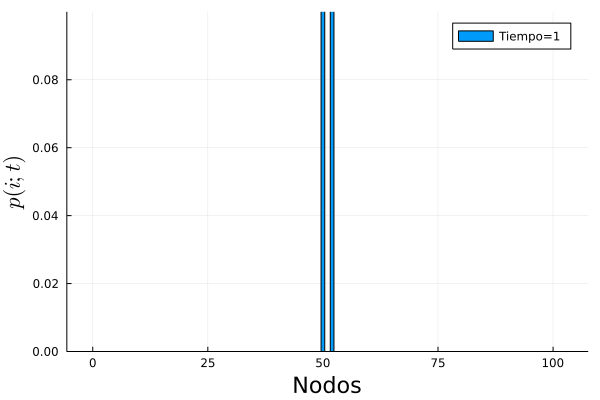

In [7]:
@time begin
    anim= @animate for l=1:stp:paso
        G=G=QuanWal_ring(l,P,ϕ,H)
        bar(1:1:P,norm.(G).^2,ylims=(0,0.1),label="Tiempo=$(l)",guidefont=fnt,ylabel=L"p(i;t)",xlabel="Nodos")
    end
    gif(anim,"./QW_ring_real(1_2).gif", fps=30)
end

In [8]:
fnt = Plots.font("sans-serif", 15) # Para gráficar loas labels
n=10  #Numerp de pasos
P=101 #Numero de nodos
### Entropia Neuman con S/Kb
Sn=zeros(n)

for j=1:n
    G=QuanWal_ring(j,P,ϕ,H)
    Dst=zeros(ComplexF64,2,2)
    pos=length(G)
    for i=1:pos
        Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
        Dst[1,2]+=G[i][1]*conj(G[i][2])
        Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
        Dst[2,1]+=conj(G[i][1])*G[i][2]
    end
    println(Dst)
    lamb=eigvals(Dst)
    Sn[j]=-(lamb[1]*log(lamb[1])+lamb[2]*log(lamb[2]))
end


ComplexF64[0.4999999999999998 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.4999999999999998 + 0.0im]
ComplexF64[0.4999999999999998 + 0.0im 0.0 - 0.2499999999999999im; 0.0 + 0.2499999999999999im 0.4999999999999998 + 0.0im]
ComplexF64[0.49999999999999967 + 0.0im 0.0 - 0.24999999999999983im; 0.0 + 0.24999999999999983im 0.49999999999999967 + 0.0im]
ComplexF64[0.49999999999999967 + 0.0im 0.0 - 0.1874999999999999im; 0.0 + 0.1874999999999999im 0.49999999999999967 + 0.0im]
ComplexF64[0.49999999999999956 + 0.0im 0.0 - 0.18749999999999983im; 0.0 + 0.18749999999999983im 0.49999999999999956 + 0.0im]
ComplexF64[0.49999999999999956 + 0.0im 0.0 - 0.21874999999999975im; 0.0 + 0.21874999999999975im 0.4999999999999995 + 0.0im]
ComplexF64[0.4999999999999993 + 0.0im 0.0 - 0.21874999999999972im; 0.0 + 0.21874999999999972im 0.4999999999999994 + 0.0im]
ComplexF64[0.4999999999999992 + 0.0im -6.938893903907228e-18 - 0.19921874999999967im; -6.938893903907228e-18 + 0.19921874999999967im 0.4999999999999992 + 0.0im]
Complex

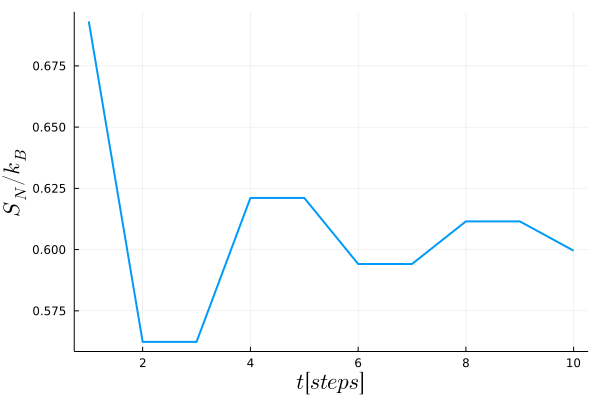

In [9]:
plot(Sn,ylabel=L"S_N/k_B",xlabel=L"t[steps]",label=false,
    guidefont=fnt,legend=:bottomright,
    legendfontsize=12.0,lw = 2)

In [10]:
Sn

10-element Vector{Float64}:
 0.6931471805599454
 0.5623351446188085
 0.5623351446188086
 0.6210863745552454
 0.6210863745552455
 0.5941300227248388
 0.594130022724839
 0.6115248010099195
 0.6115248010099195
 0.5995431322385639

In [11]:
Dst

LoadError: UndefVarError: Dst not defined